# OBJECTIVE:

# To apply GBDT and Random forests on Amazon food reviews

In [1]:
%%time
# Functions to retireve files 
import pickle
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

Wall time: 0 ns


In [2]:
#Loading the variable from file
final_100000 = openfromfile("prepocessed_data.pickle")
final_100000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


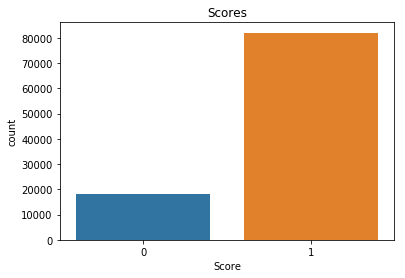

Wall time: 260 ms


In [4]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(final_100000.Score,ax=ax)
plt.title("Scores")
plt.show()
final_100000['Score'].value_counts()

In [5]:
%%time
final_100000['Score'].value_counts()

Wall time: 4.99 ms


1    81998
0    18002
Name: Score, dtype: int64

In [3]:
%%time
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data with 70:30 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70000,)
(30000,)
(70000,)
(30000,)
Wall time: 14.7 s


# 1.BOW:

In [17]:
%%time
#loading the Bag of words train and test data
Train_BOW_X = openfromfile("kfold_tr_bow_x.pickle")
Test_BOW_X= openfromfile("kfold_te_bow_x.pickle")
print(Train_BOW_X .shape)
print(Test_BOW_X.shape)

(70000, 37337)
(30000, 37337)
Wall time: 498 ms


# 1.1 BOW Random forests:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [5]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#params we need to try on classifier
param_dist = {'n_estimators':[3,5,10,15,20],
             'max_depth':[5,10,15,20,25]} 
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(Train_BOW_X, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.4min finished


Best HyperParameter:  {'max_depth': 25, 'n_estimators': 5}
Best Accuracy: 82.89%
Wall time: 3min 29s


Confusion matrices for test data
----------------------------
Accuracy on test set: 80.890%
Precision on test set:0.809%
Recall on test set: 0.998
F1-Score on test set: 0.894
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 6.23 s


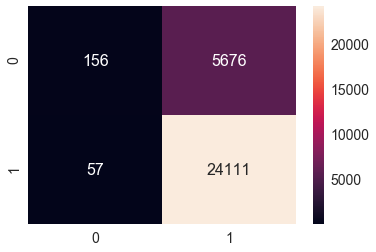

In [28]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5,max_depth=25)
clf.fit(Train_BOW_X, Y_train)
y_pred = clf.predict(Test_BOW_X)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 83.8342857143
precision: 0.836560446876
Recall: 0.999619574615
F1-score 0.910849903886


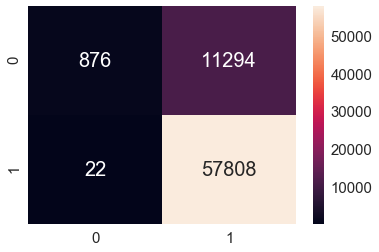

Wall time: 512 ms


In [29]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(Train_BOW_X)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

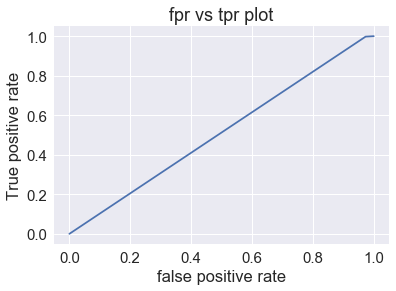

Area under curve is: 51.220%
Wall time: 261 ms


In [31]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

In [36]:
%%time
#using the heat map to plot the accuracy score for two hyperparameters
#params we need to try on classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
RF = RandomForestClassifier(random_state = 2)
#taking 5 values in each n_estimators and max_depth
n_estimators = [3,5,10,15,20]
max_depth= [3,5,10,15,20]
parameters = {'n_estimators': n_estimators, 'max_depth':max_depth}
#Error of Accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#defining Grid Search Object.
grid_obj = GridSearchCV(RF, parameters,  scorer)
#fitting the train data on classifier
grid_obj.fit(Train_BOW_X, Y_train)

Wall time: 2min 33s


In [37]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

Wall time: 0 ns


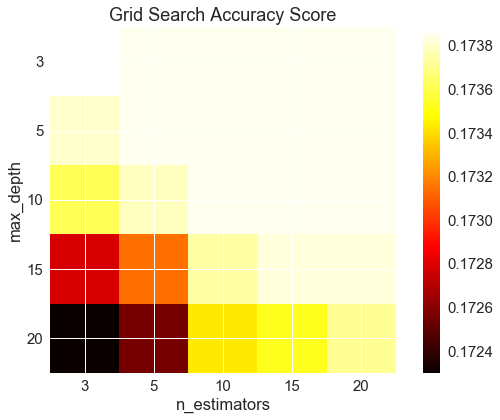

In [38]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depth)),max_depth)
plt.title('Grid Search Accuracy Score')
plt.show()

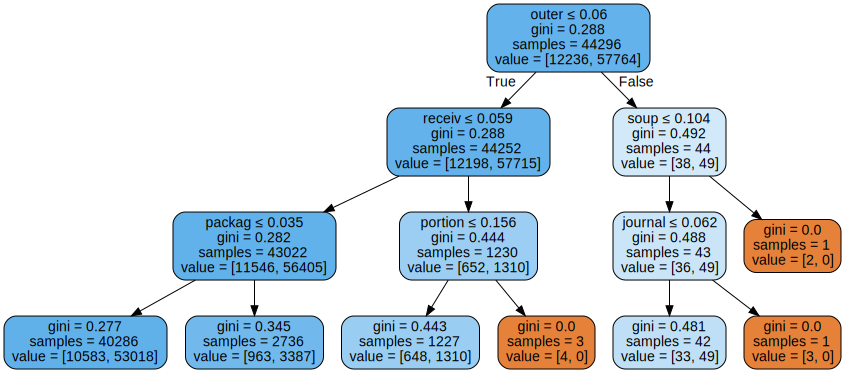

In [13]:
# Visualize single decision tree data of entire random forest using graphviz.
from sklearn.tree import export_graphviz
import pydotplus
from collections import defaultdict
import graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
#using count vectoriser to get Bag of words
count_vect = CountVectorizer()
count_vect.fit_transform(X_train)
n_estimators = [3,5,10,15,20]
for i in n_estimators:
#instead for depth of 15 ,only depth of 3 is taken.
 clf=RandomForestClassifier(n_estimators=i, max_depth=3, random_state = 2)
 clf.fit(Train_BOW_X,Y_train)
#using the number of estimators=5 whose index is 2
tree = clf.estimators_[2]
#using count vectoriser to get important features 
important_features =count_vect.get_feature_names()
dot_data =export_graphviz(tree,out_file=None,feature_names=important_features,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [26]:
%%time
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(important_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True)[:20]
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:20}'.format(*pair)) for pair in feature_importances];

Variable: didnt                Importance:                 0.06
Variable: love                 Importance:                 0.04
Variable: receiv               Importance:                 0.04
Variable: threw                Importance:                 0.04
Variable: would                Importance:                 0.04
Variable: buy                  Importance:                 0.03
Variable: delici               Importance:                 0.03
Variable: end                  Importance:                 0.03
Variable: mayb                 Importance:                 0.03
Variable: store                Importance:                 0.03
Variable: thought              Importance:                 0.03
Variable: wouldnt              Importance:                 0.03
Variable: aftertast            Importance:                 0.02
Variable: bottom               Importance:                 0.02
Variable: buyer                Importance:                 0.02
Variable: china                Importanc

# 1.2 BOW Boosting Classifier:

Finding the best 'no of estimators' and 'learning rate' using the Grid search cross validation(K-fold cross validation):

In [5]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#params we need to try on classifier
param_dist = {'n_estimators':[20,40,60,80,100],
             'learning_rate':[0.1,0.2,0.3,0.4,0.5]} 
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(Train_BOW_X, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 200.4min finished


Best HyperParameter:  {'learning_rate': 0.4, 'n_estimators': 100}
Best Accuracy: 86.65%
Wall time: 3h 21min 53s


Confusion matrices for test data
----------------------------
Accuracy on test set: 86.080%
Precision on test set:0.867%
Recall on test set: 0.977
F1-Score on test set: 0.919
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 1min 34s


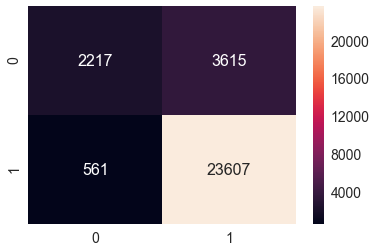

In [25]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
clf = GradientBoostingClassifier(learning_rate=0.4,n_estimators=100)
clf.fit(Train_BOW_X, Y_train)
y_pred = clf.predict(Test_BOW_X)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 88.9271428571
precision: 0.892093766148
Recall: 0.985128825869
F1-score 0.936305889507


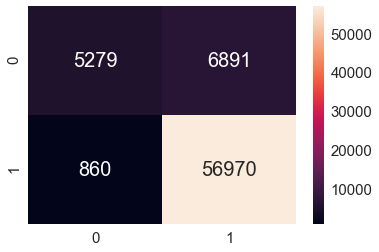

Wall time: 485 ms


In [10]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
import matplotlib.pyplot as plt
pred = clf.predict(Train_BOW_X)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

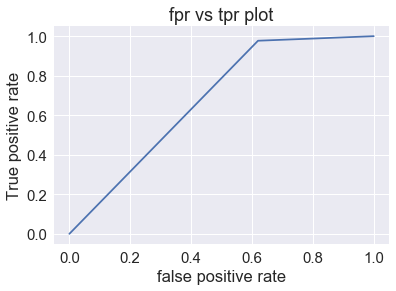

Area under curve is: 67.853%
Wall time: 226 ms


In [11]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

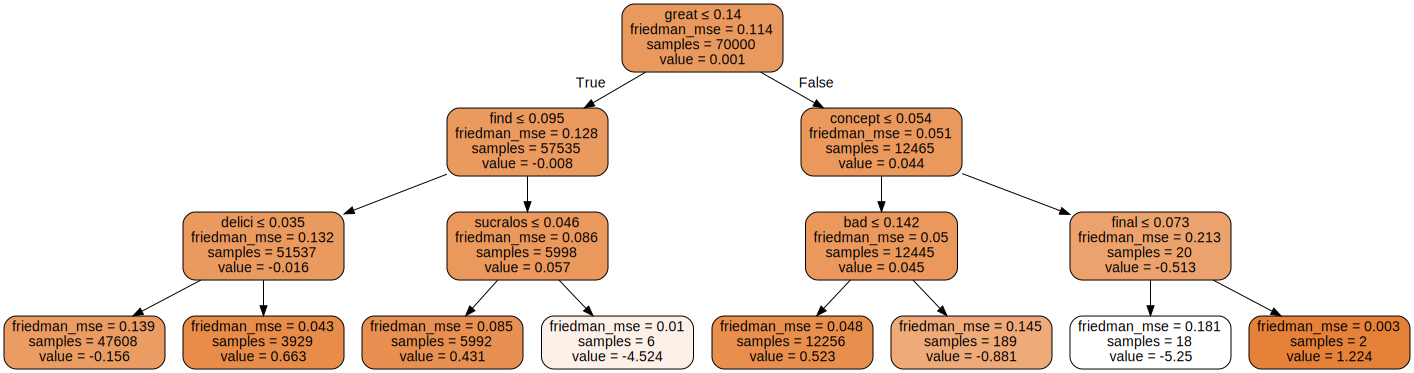

In [75]:
# Visualize single decision tree data of entire random forest using graphviz.
from sklearn.tree import export_graphviz
import pydotplus
from collections import defaultdict
import graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
#using count vectoriser to get Bag of words
count_vect= CountVectorizer()
count_vect.fit_transform(X_train)
#learning rate of 0.4,number of estimators of 100,depth of 3 is taken.
clf = GradientBoostingClassifier(learning_rate=0.4,n_estimators=100, max_depth=3,random_state = 2)
clf.fit(Train_BOW_X,Y_train)
# Get the tree number 12 and 0 for binary classification
tree = clf.estimators_[12,0]
#using count vectoriser to get important features 
important_features =count_vect.get_feature_names()
dot_data =export_graphviz(tree,out_file=None,feature_names=important_features,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [76]:
%%time
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(important_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True)[:20]
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:20}'.format(*pair)) for pair in feature_importances];

Variable: great                Importance:                 0.02
Variable: alway                Importance:                 0.01
Variable: amaz                 Importance:                 0.01
Variable: best                 Importance:                 0.01
Variable: bland                Importance:                 0.01
Variable: box                  Importance:                 0.01
Variable: broken               Importance:                 0.01
Variable: cancel               Importance:                 0.01
Variable: delici               Importance:                 0.01
Variable: descript             Importance:                 0.01
Variable: didnt                Importance:                 0.01
Variable: disappoint           Importance:                 0.01
Variable: enjoy                Importance:                 0.01
Variable: excel                Importance:                 0.01
Variable: expect               Importance:                 0.01
Variable: favorit              Importanc

# 2.Tf-idf:

In [4]:
%%time
#loading the TFIDF train and test data
Train_TFIDF_X = openfromfile("kfold_tr_tfidf_x.pickle")
Test_TFIDF_X= openfromfile("kfold_te_tfidf_x.pickle")
print(Train_TFIDF_X .shape)
print(Test_TFIDF_X.shape)

(70000, 37337)
(30000, 37337)
Wall time: 790 ms


# 2.1 TFIDF Random forests:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [37]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#params we need to try on classifier
param_dist = {'n_estimators':[3,5,10,15,20],
             'max_depth':[5,10,15,20,25]} 
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(Train_TFIDF_X, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.3min finished


Best HyperParameter:  {'max_depth': 25, 'n_estimators': 3}
Best Accuracy: 82.84%
Wall time: 3min 16s


Confusion matrices for test data
----------------------------
Accuracy on test set: 80.900%
Precision on test set:0.811%
Recall on test set: 0.995
F1-Score on test set: 0.893
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 893 ms


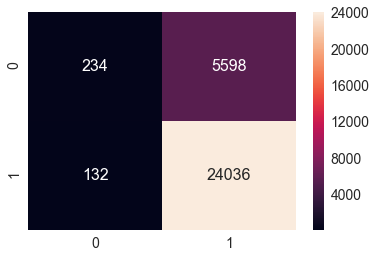

In [38]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=3,max_depth=25)
clf.fit(Train_TFIDF_X, Y_train)
y_pred = clf.predict(Test_TFIDF_X)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 83.7685714286
precision: 0.836724637681
Recall: 0.998339961957
F1-score 0.910415516834


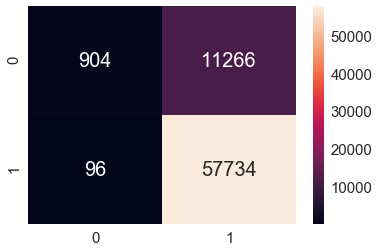

Wall time: 503 ms


In [39]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(Train_TFIDF_X)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

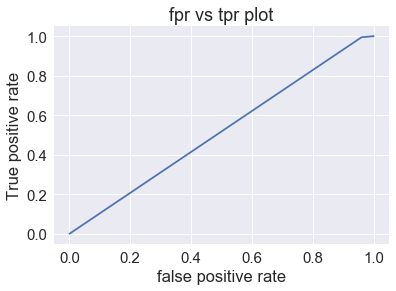

Area under curve is: 51.733%
Wall time: 186 ms


In [40]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

In [41]:
%%time
#using the heat map to plot the accuracy score for two hyperparameters
#params we need to try on classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
RF = RandomForestClassifier(random_state = 2)
#taking 5 values in each n_estimators and max_depth
n_estimators = [3,5,10,15,20]
max_depth= [3,5,10,15,20]
parameters = {'n_estimators': n_estimators, 'max_depth':max_depth}
#Error of accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#defining Grid Search Object.
grid_obj = GridSearchCV(RF, parameters,  scorer)
#fitting the train data on classifier
grid_obj.fit(Train_BOW_X, Y_train)

Wall time: 2min 20s


In [42]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

Wall time: 0 ns


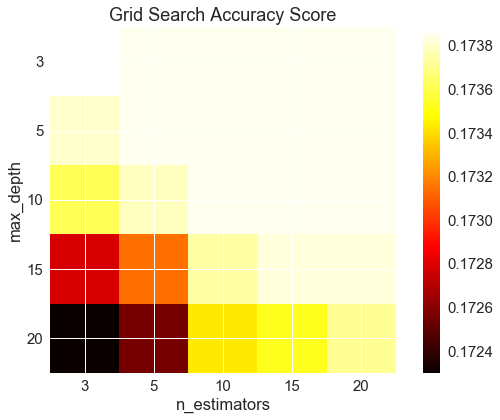

In [43]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depth)),max_depth)
plt.title('Grid Search Accuracy Score')
plt.show()

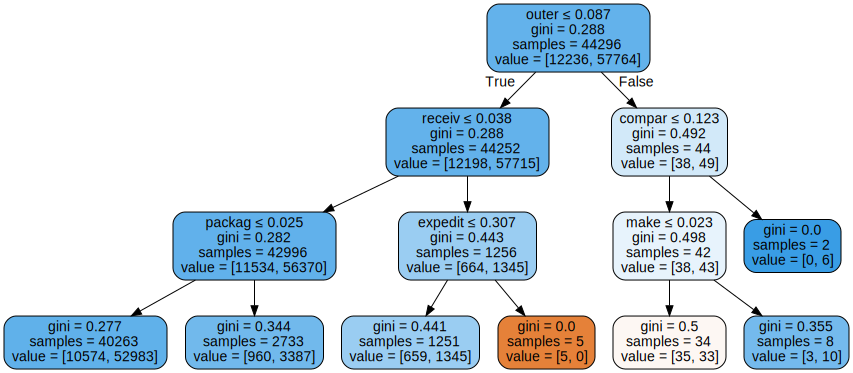

In [77]:
# Visualize single decision tree data of entire random forest using graphviz.
from sklearn.tree import export_graphviz
import pydotplus
from collections import defaultdict
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
#using tfidf vectoriser to get tfidf vectors
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)
n_estimators = [3,5,10,15,20]
for i in n_estimators:
#instead for depth of 15 ,only depth of 3 is taken.
 clf=RandomForestClassifier(n_estimators=i, max_depth=3, random_state = 2)
 clf.fit(Train_TFIDF_X,Y_train)
#using the number of estimators=3 whose index is 2
tree = clf.estimators_[2]
#using tfidf vectoriser to get important features 
important_features =tfidf.get_feature_names()
dot_data =export_graphviz(tree,out_file=None,feature_names=important_features,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [45]:
%%time
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(important_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True)[:20]
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:20}'.format(*pair)) for pair in feature_importances];

Variable: didnt                Importance:                 0.06
Variable: buy                  Importance:                 0.04
Variable: love                 Importance:                 0.04
Variable: threw                Importance:                 0.04
Variable: would                Importance:                 0.04
Variable: assum                Importance:                 0.03
Variable: delici               Importance:                 0.03
Variable: end                  Importance:                 0.03
Variable: mayb                 Importance:                 0.03
Variable: receiv               Importance:                 0.03
Variable: store                Importance:                 0.03
Variable: wouldnt              Importance:                 0.03
Variable: aftertast            Importance:                 0.02
Variable: appear               Importance:                 0.02
Variable: bottom               Importance:                 0.02
Variable: buyer                Importanc

# 2.2 TFIDF Boosting Classifier:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [21]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#params we need to try on classifier
n_estimators = [60,80,100]
learning_rate= [0.3,0.4,0.5]
param_dist = {'n_estimators':n_estimators,
             'learning_rate':learning_rate} 
#Error of accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,scorer,cv=2,verbose=1)
gsv.fit(Train_TFIDF_X, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 32.0min finished


Best HyperParameter:  {'learning_rate': 0.3, 'n_estimators': 60}
Best Accuracy: 14.31%
Wall time: 33min 2s


In [22]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = gsv.cv_results_['mean_test_score'].reshape(len(learning_rate),len(n_estimators))

Wall time: 0 ns


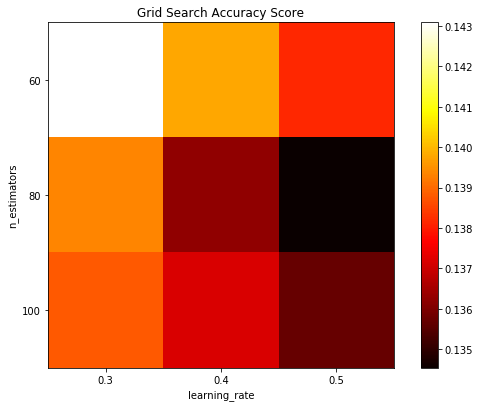

In [24]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.colorbar()
plt.xticks(np.arange(len(learning_rate)),learning_rate)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.title('Grid Search Accuracy Score')
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 84.787%
Precision on test set:0.850%
Recall on test set: 0.984
F1-Score on test set: 0.912
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 1min 12s


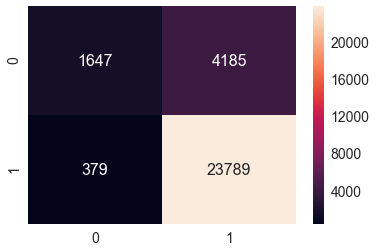

In [25]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
clf = GradientBoostingClassifier(learning_rate=0.3,n_estimators=60)
clf.fit(Train_TFIDF_X, Y_train)
y_pred = clf.predict(Test_TFIDF_X)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 86.82
precision: 0.868748482641
Recall: 0.990039771745
F1-score 0.925436824155


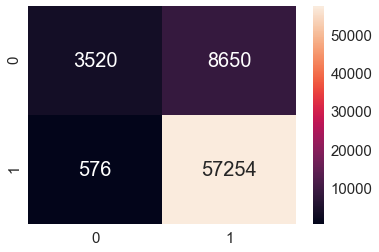

Wall time: 419 ms


In [26]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
import matplotlib.pyplot as plt
pred = clf.predict(Train_TFIDF_X)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

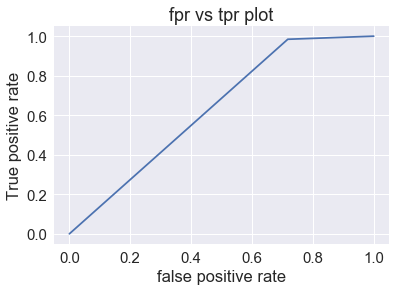

Area under curve is: 63.336%
Wall time: 193 ms


In [27]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

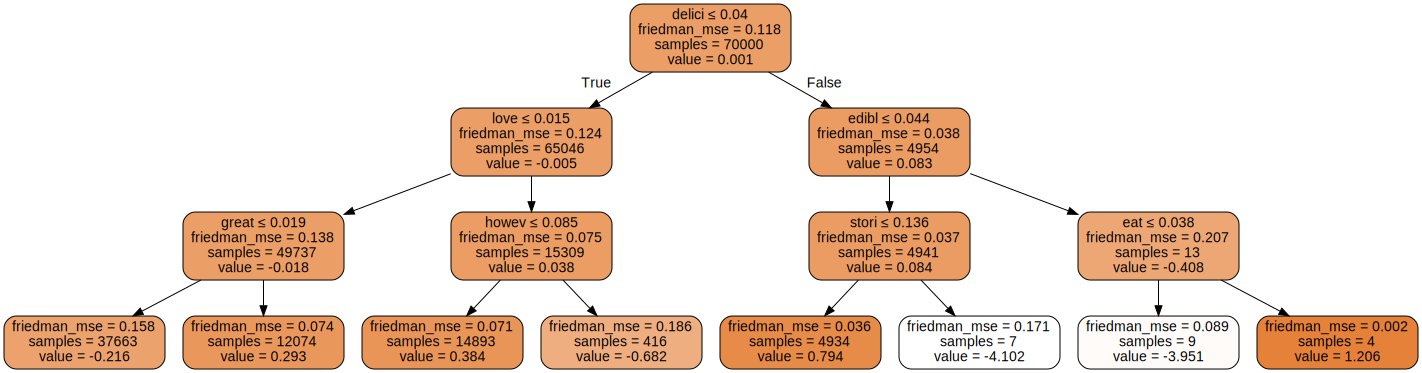

In [28]:
# Visualize single decision tree data of entire random forest using graphviz.
from sklearn.tree import export_graphviz
import pydotplus
from collections import defaultdict
import graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
#using count vectoriser to get Bag of words
count_vect = CountVectorizer()
count_vect.fit_transform(X_train)
#learning rate of 0.4,depth of 3 is taken.
clf = GradientBoostingClassifier(learning_rate=0.3,n_estimators=60, max_depth=3,random_state = 2)
clf.fit(Train_TFIDF_X,Y_train)
# Get the tree number 12 and 0 for binary classification
tree = clf.estimators_[12,0]
#using count vectoriser to get important features 
important_features =count_vect.get_feature_names()
dot_data =export_graphviz(tree,out_file=None,feature_names=important_features,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [29]:
%%time
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(important_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True)[:20]
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:20}'.format(*pair)) for pair in feature_importances];

Variable: great                Importance:                 0.03
Variable: love                 Importance:                 0.03
Variable: best                 Importance:                 0.02
Variable: delici               Importance:                 0.02
Variable: disappoint           Importance:                 0.02
Variable: perfect              Importance:                 0.02
Variable: alway                Importance:                 0.01
Variable: amaz                 Importance:                 0.01
Variable: aw                   Importance:                 0.01
Variable: bad                  Importance:                 0.01
Variable: bland                Importance:                 0.01
Variable: box                  Importance:                 0.01
Variable: broken               Importance:                 0.01
Variable: cancel               Importance:                 0.01
Variable: didnt                Importance:                 0.01
Variable: disgust              Importanc

# 3.AVG-W2V:

In [30]:
%%time
#loading the Average word to vector train and test data
avg_w2v_tr = openfromfile("kfold_avg_w2v_tr.pickle")
avg_w2v_test = openfromfile("kfold_avg_w2v_te.pickle")
print(len(avg_w2v_tr))
print(len(avg_w2v_test))

70000
30000
Wall time: 102 ms


# 3.1 AVG-W2V Random forests:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [31]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#params we need to try on classifier
n_estimators=[3,5,10,15,20]
max_depth=[5,10,15,20,25]
param_dist = {'n_estimators':n_estimators,
             'max_depth':max_depth} 
#Error of accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,scorer,cv=3,verbose=1)
gsv.fit(avg_w2v_tr, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.2min finished


Best HyperParameter:  {'max_depth': 25, 'n_estimators': 3}
Best Accuracy: 18.86%
Wall time: 5min 15s


In [32]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = gsv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

Wall time: 0 ns


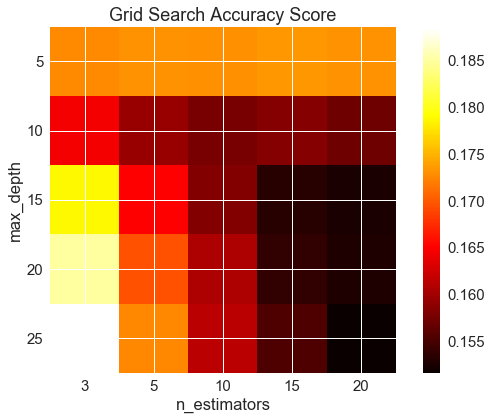

In [33]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depth)),max_depth)
plt.title('Grid Search Accuracy Score')
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 80.017%
Precision on test set:0.849%
Recall on test set: 0.915
F1-Score on test set: 0.881
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 3.1 s


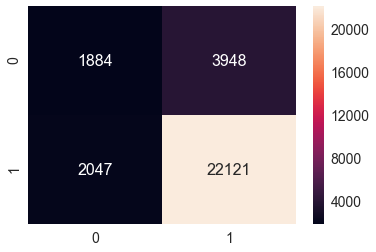

In [62]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=3,max_depth=25)
clf.fit(avg_w2v_tr, Y_train)
y_pred = clf.predict(avg_w2v_test)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 96.3828571429
precision: 0.970029239766
Recall: 0.986702403597
F1-score 0.978294786291


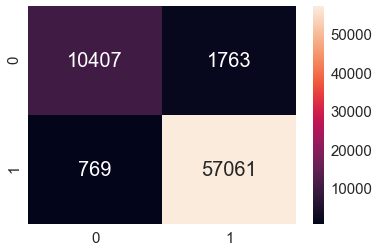

Wall time: 424 ms


In [51]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(avg_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

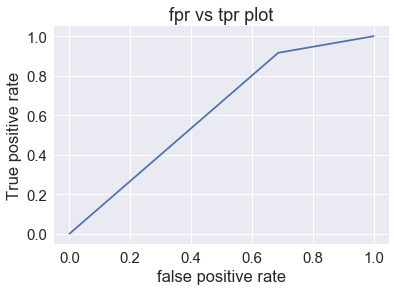

Area under curve is: 61.488%
Wall time: 185 ms


In [52]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 3.2 AVG-W2V Boosting Classifier:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [35]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#params we need to try on classifier
n_estimators=[60,80,100]
learning_rate=[0.3,0.4,0.5]
param_dist = {'n_estimators':n_estimators,
             'learning_rate':learning_rate} 
#Error of accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,scorer,cv=2,verbose=1)
gsv.fit(avg_w2v_tr, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.9min finished


Best HyperParameter:  {'learning_rate': 0.5, 'n_estimators': 80}
Best Accuracy: 14.40%
Wall time: 7min 43s


In [36]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = gsv.cv_results_['mean_test_score'].reshape(len(learning_rate),len(n_estimators))

Wall time: 0 ns


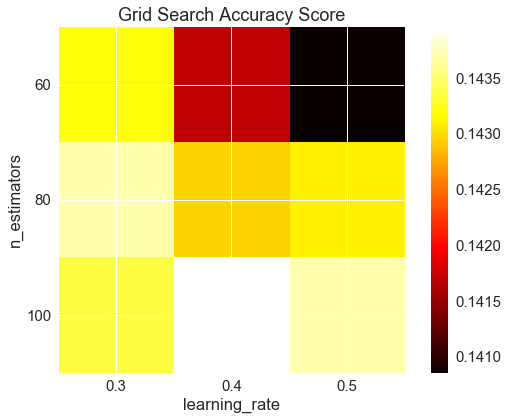

In [37]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.colorbar()
plt.xticks(np.arange(len(learning_rate)),learning_rate)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.title('Grid Search Accuracy Score')
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 84.867%
Precision on test set:0.870%
Recall on test set: 0.955
F1-Score on test set: 0.910
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 51.5 s


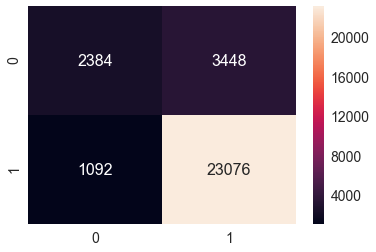

In [39]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
clf = GradientBoostingClassifier(learning_rate=0.5,n_estimators=80)
clf.fit(avg_w2v_tr, Y_train)
y_pred = clf.predict(avg_w2v_test)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 87.6242857143
precision: 0.894820525175
Recall: 0.963444578938
F1-score 0.92786543986


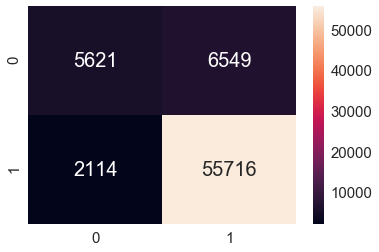

Wall time: 503 ms


In [40]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
import matplotlib.pyplot as plt
pred = clf.predict(avg_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

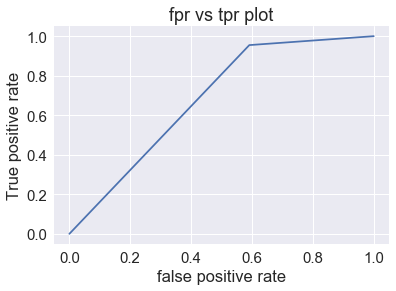

Area under curve is: 68.180%
Wall time: 173 ms


In [41]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 4.Tf-idf- W2V:

In [42]:
%%time
#loading the tfidf word to vector train and test data
tfidf_w2v_tr = openfromfile("kfold_tfidf_w2v_tr.pickle")
tfidf_w2v_test = openfromfile("kfold_tfidf_w2v_te.pickle")
print(len(tfidf_w2v_tr))
print(len(tfidf_w2v_test))

70000
30000
Wall time: 622 ms


# 4.1 TFIDF-W2V Random forests:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [55]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#params we need to try on classifier
n_estimators=[3,5,10,15,20]
max_depth=[5,10,15,20,25]
param_dist = {'n_estimators':n_estimators
             'max_depth':max_depth} 
#Error of accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,scorer,cv=3,verbose=1)
gsv.fit(tfidf_w2v_tr, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.2min finished


Best HyperParameter:  {'max_depth': 25, 'n_estimators': 3}
Best Accuracy: 19.74%
Wall time: 6min 14s


In [57]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = gsv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

Wall time: 0 ns


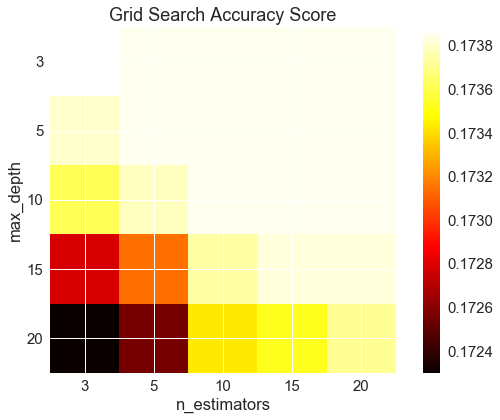

In [58]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depth)),max_depth)
plt.title('Grid Search Accuracy Score')
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 79.190%
Precision on test set:0.843%
Recall on test set: 0.911
F1-Score on test set: 0.876
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 2.79 s


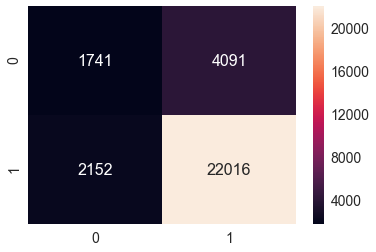

In [66]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=3,max_depth=25)
clf.fit(tfidf_w2v_tr, Y_train)
y_pred = clf.predict(tfidf_w2v_test)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 96.2028571429
precision: 0.967924144248
Recall: 0.986736987723
F1-score 0.977240032881


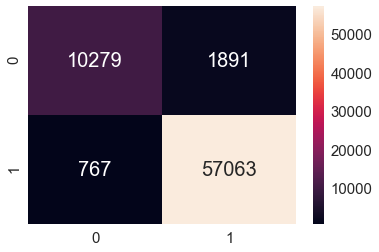

Wall time: 424 ms


In [68]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(tfidf_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

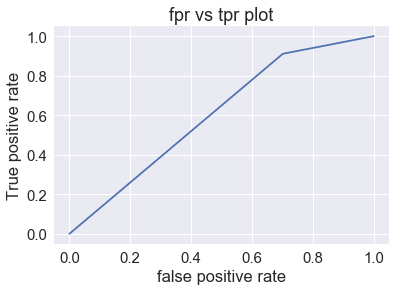

Area under curve is: 60.474%
Wall time: 284 ms


In [69]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 4.2 TFIDF-W2V Boosting Classifier:

Finding the best 'no of estimators' and 'depth' using the Grid search cross validation(K-fold cross validation):

In [44]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#params we need to try on classifier
n_estimators=[60,80,100]
learning_rate=[0.3,0.4,0.5]
param_dist = {'n_estimators':n_estimators,
             'learning_rate':learning_rate} 
#Error of accuracy score is used as a scorer
def error_value(Y_test, y_pred):
    acc_value = accuracy_score(Y_test, y_pred)
    error_val=1-acc_value
    return error_val
scorer = make_scorer(error_value, greater_is_better=True)
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,scorer,cv=2,verbose=1)
gsv.fit(avg_w2v_tr, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.7min finished


Best HyperParameter:  {'learning_rate': 0.5, 'n_estimators': 80}
Best Accuracy: 14.39%
Wall time: 7min 34s


In [45]:
%%time
#To create a heat map, you need to have 2 dimentional matrix at first
scores = gsv.cv_results_['mean_test_score'].reshape(len(learning_rate),len(n_estimators))

Wall time: 999 µs


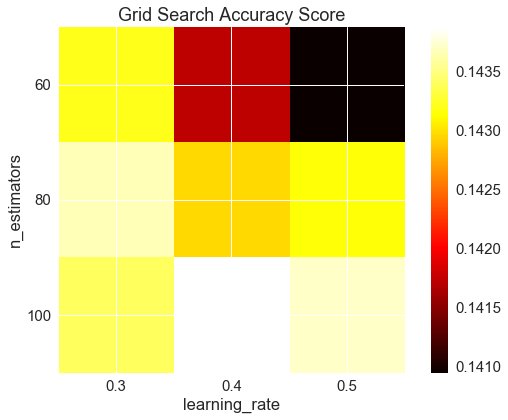

In [46]:
#Using scores for plotting a heat map.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=1.2, right=1.95, bottom=1.15, top=1.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
plt.colorbar()
plt.xticks(np.arange(len(learning_rate)),learning_rate)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.title('Grid Search Accuracy Score')
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 84.867%
Precision on test set:0.870%
Recall on test set: 0.955
F1-Score on test set: 0.910
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 1min


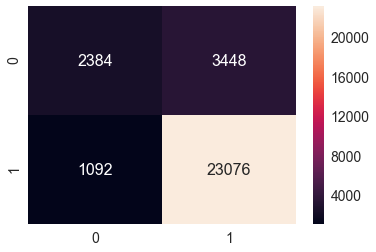

In [47]:
%%time
#Using best hyperparameter values to find accuracy,precision,recall,f1_score on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import seaborn as sns
clf = GradientBoostingClassifier(learning_rate=0.5,n_estimators=80)
clf.fit(avg_w2v_tr, Y_train)
y_pred = clf.predict(avg_w2v_test)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 87.6242857143
precision: 0.894820525175
Recall: 0.963444578938
F1-score 0.92786543986


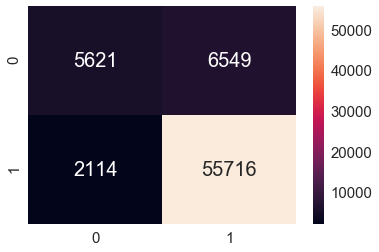

Wall time: 525 ms


In [48]:
%%time
#Using best hyperparameter value to find accuracy,precision,recall,f1_score on train data
import matplotlib.pyplot as plt
pred = clf.predict(avg_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

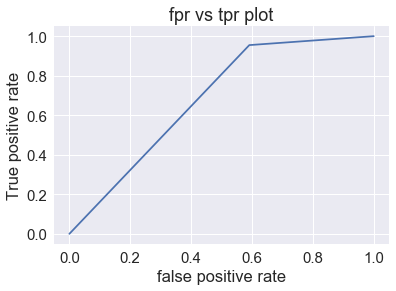

Area under curve is: 68.180%
Wall time: 185 ms


In [49]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# Summary:

**Random Forests with different text classifications:**
**Below values are for test data**   

**Random Forest Classifier:**    

|          |sample size|no. of estimators|max-depth|        |              |              |            |       |                            
|----------|-----------|-----------------|---------|--------|--------------|--------------|------------|-------| 
|          |           |                 |         |Accuracy|Precision     |Recall        |F1-score    |AUC    |
|BOW       |  100k     |5                |25       |80.89%  |    0.809     |    0.998     |  0.994     |51.22  |
|TF-IDF    |  100k     |3                |25       |80.90%  |    0.811     |    0.995     |  0.893     |51.73  |
|Avg-W2V   |  100k     |3                |25       |80.01%  |    0.849     |    0.915     |  0.881     |61.48  |
|TF-IDF W2V|  100k     |3                |25       |79.19%  |    0.843     |    0.911     |  0.876     |60.47  |

**Gradient Boosting Classifier:**    

|          |sample size|no. of estimators|learning-rate|              |              |              |            |       |                            
|----------|-----------|-----------------|-------------|--------------|--------------|--------------|------------|       |
|          |           |                 |             |Accuracy      |Precision     |Recall        |F1-score    |AUC    |
|BOW       |  100k     |100              |0.4          |86.08%        |    0.867     |    0.977     |  0.919     |67.85  |
|TF-IDF    |  100k     |60               |0.3          |84.78%        |    0.850     |    0.984     |  0.912     |63.33  |
|Avg-W2V   |  100k     |100              |0.4          |84.86%        |    0.870     |    0.955     |  0.910     |68.18  |
|TF-IDF W2V|  100k     |80               |0.5          |84.86%        |    0.870     |    0.955     |  0.910     |68.18  |

Step by step proStep by step procedure:

1.Firstly 100k rows were taken and splitted into 70:30 as 70k rows for train data,30k rows for test data.

2.Then converted these train and test data into vectors by using Bag of words,Tfidf,Avg word 2 vec and Tfidf word 2 vec.

3.Now applied Random Forest classifier for the trained data to find the number of estimators and maximum depth value using K-fold cross validation.And then found test and cv f1 scores.

4.Using the obtained hyper parameter values found the metrics for both train and test data.And then found important features for both positive and negative classes.And then found the Area under curve for fpr vs tpr plots.

5.Now applied gradient based classifier for the trained data to find the number of estimators and learning rate value using K-fold cross validation.And then found test and cv f1 scores.

6.Using the obtained hyper parameter values found the metrics for both train and test data.And then found important features for both positive and negative classes.And then found the Area under curve for fpr vs tpr plots.
    
    
    